In [5]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor

In [6]:
# Set path
downloads_path = os.path.expanduser('~/Downloads')
os.chdir(downloads_path)

# Load train data
train_data3 = pd.read_csv('train_data3.csv')
train_data4 = pd.read_csv('train_data4.csv')
train_data5 = pd.read_csv('train_data5.csv')
train_data7 = pd.read_csv('train_data7.csv')
train_data = pd.concat([train_data3,train_data4,train_data5,train_data7], axis = 0).drop(columns=['Unnamed: 0'])

In [3]:
train_data.shape

(400000, 10)

In [4]:
train_data.head()

,anti_symmetry,proportion_blue,proportion_red,blockiness_values,transition_frequency,popular_proportions,length,transition_frequency_deviation,anti_symmetry_deviation,fractions
0,0.58,0.51,0.49,0.07,0.225,0.51,3,-0.022542,0.079974,0.244898
1,0.56,0.50,0.50,0.07,0.225,0.50,3,-0.022542,0.059974,0.237551
2,0.44,0.52,0.48,0.08,0.240,0.52,3,-0.007542,-0.060026,0.251020
3,0.42,0.55,0.45,0.07,0.225,0.55,3,-0.022542,-0.080026,0.255918
4,0.52,0.50,0.50,0.08,0.270,0.50,3,0.022458,0.019974,0.245714


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   anti_symmetry                   400000 non-null  float64
 1   proportion_blue                 400000 non-null  float64
 2   proportion_red                  400000 non-null  float64
 3   blockiness_values               400000 non-null  float64
 4   transition_frequency            400000 non-null  float64
 5   popular_proportions             400000 non-null  float64
 6   length                          400000 non-null  int64  
 7   transition_frequency_deviation  400000 non-null  float64
 8   anti_symmetry_deviation         400000 non-null  float64
 9   fractions                       400000 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 33.6 MB


In [6]:
test_files = {
    3: 'test_data3.csv',
    4: 'test_data4.csv',
    5: 'test_data5.csv',
    6: 'test_data6.csv',
    7: 'test_data7.csv'
}

test_data_dict = {}
for k, filename in test_files.items():
    test_data_dict[k] = pd.read_csv(filename).drop(columns=['Unnamed: 0'])

# Loop through each test dataset, training a separate model for each k
for k, test_data in test_data_dict.items():
    # Extract train data for the corresponding k
    train_data_k = train_data.copy()  

    # Separate features and target variable
    X_train = train_data_k.drop(columns=['fractions'])
    y_train = train_data_k['fractions']
    
    X_test = test_data.drop(columns=['fractions'])
    y_test = test_data['fractions']

    # Scale 'length' feature
    scaler = MinMaxScaler()
    X_train['length'] = scaler.fit_transform(X_train[['length']])  # Fit on train set
    X_test['length'] = scaler.transform(X_test[['length']])  # Transform test set

    # Train a new model for this k
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Compute RMSE, MSE, and R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Compute Baseline RMSE
    y_baseline = np.full_like(y_test, 1 / (2 ** (k - 1)))  # Baseline prediction
    baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline))

    # Print results for k
    print(f"\n--- Results for k = {k} ---")
    print(f"  MSE: {mse:.6f}")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  R²: {r2:.6f}")
    print(f"  Baseline RMSE: {baseline_rmse:.6f}")



--- Results for k = 3 ---
  MSE: 0.088248
  RMSE: 0.297066
  R²: -556.375061
  Baseline RMSE: 0.012583

--- Results for k = 4 ---
  MSE: 0.052741
  RMSE: 0.229654
  R²: -253.910462
  Baseline RMSE: 0.014384

--- Results for k = 5 ---
  MSE: 0.000111
  RMSE: 0.010545
  R²: 0.383520
  Baseline RMSE: 0.013430

--- Results for k = 6 ---
  MSE: 0.000093
  RMSE: 0.009669
  R²: 0.268771
  Baseline RMSE: 0.011307

--- Results for k = 7 ---
  MSE: 0.107108
  RMSE: 0.327274
  R²: -1367.464735
  Baseline RMSE: 0.008847


## LR with feature importance and scatterplots


--- Feature Importance for k = 3 ---
anti_symmetry: 52.742965
proportion_blue: -0.000000
proportion_red: -0.000000
blockiness_values: 0.000023
transition_frequency: 15.957105
popular_proportions: 0.000239
length: 0.000000
transition_frequency_deviation: 15.956674
anti_symmetry_deviation: 52.742666


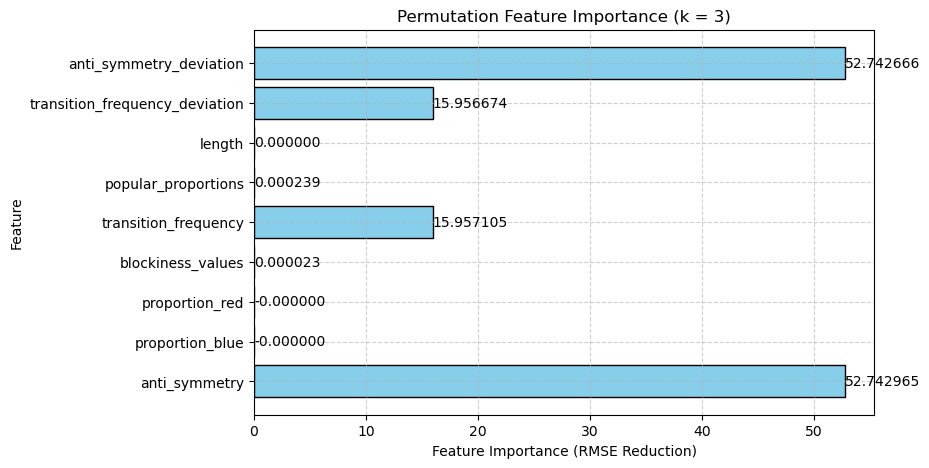

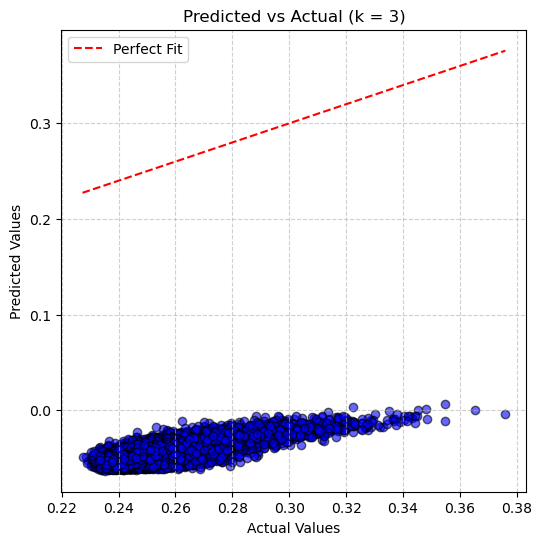


--- Results for k = 3 ---
  MSE: 0.088248
  RMSE: 0.297066
  R²: -556.375061
  Baseline RMSE: 0.012583

--- Feature Importance for k = 4 ---
anti_symmetry: 52.648231
proportion_blue: 0.000000
proportion_red: 0.000000
blockiness_values: 0.000045
transition_frequency: 15.876589
popular_proportions: 0.000317
length: 0.000000
transition_frequency_deviation: 15.876585
anti_symmetry_deviation: 52.648027


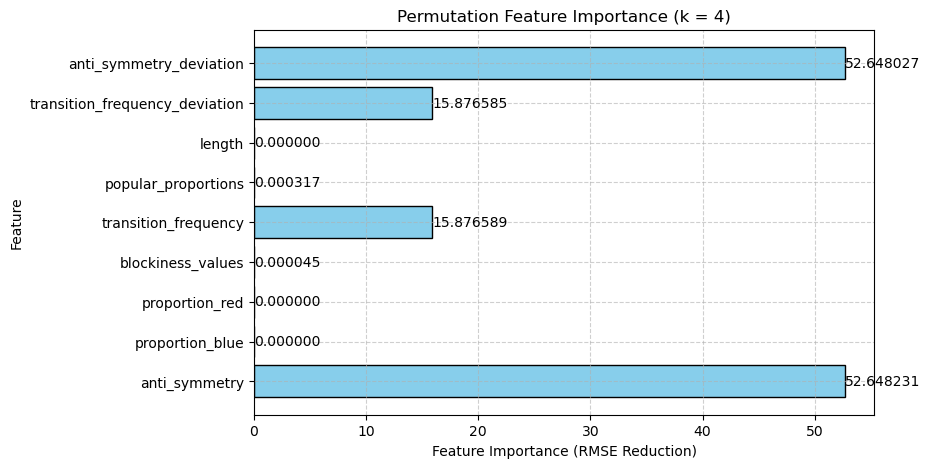

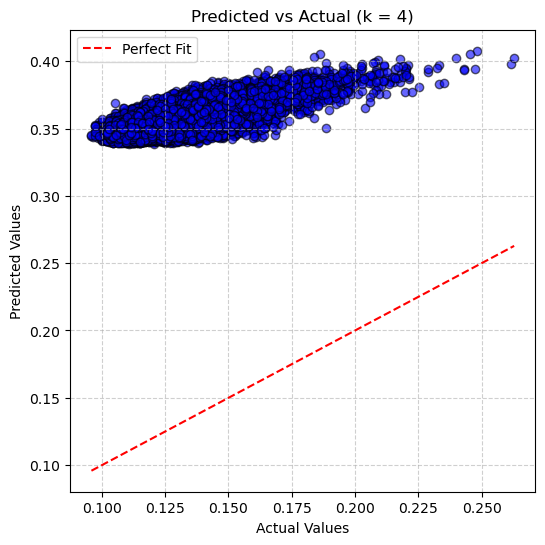


--- Results for k = 4 ---
  MSE: 0.052741
  RMSE: 0.229654
  R²: -253.910462
  Baseline RMSE: 0.014384

--- Feature Importance for k = 5 ---
anti_symmetry: 52.722088
proportion_blue: 0.000000
proportion_red: 0.000000
blockiness_values: 0.000968
transition_frequency: 16.137100
popular_proportions: 0.004541
length: 0.000000
transition_frequency_deviation: 16.136704
anti_symmetry_deviation: 52.721672


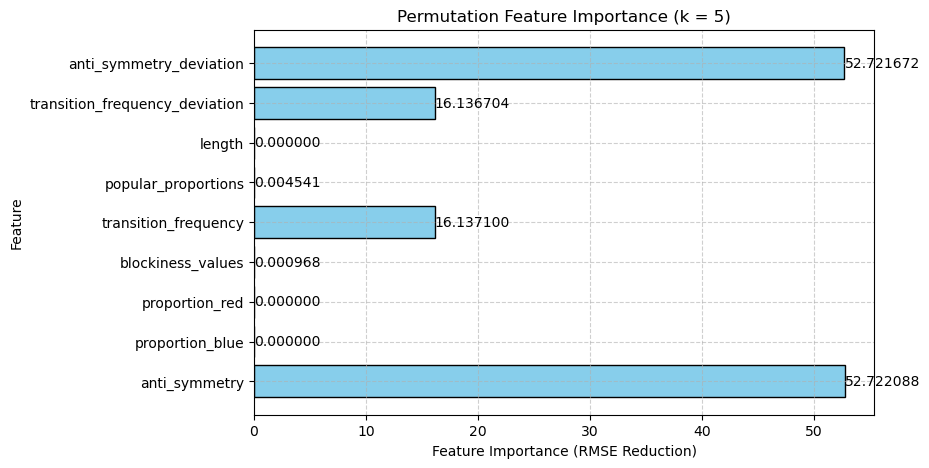

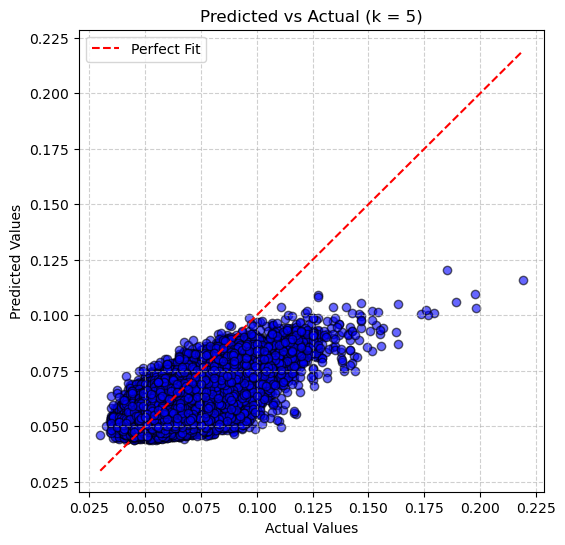


--- Results for k = 5 ---
  MSE: 0.000111
  RMSE: 0.010545
  R²: 0.383520
  Baseline RMSE: 0.013430

--- Feature Importance for k = 6 ---
anti_symmetry: 52.823394
proportion_blue: -0.000000
proportion_red: -0.000000
blockiness_values: 0.000979
transition_frequency: 16.283457
popular_proportions: 0.003815
length: 0.000000
transition_frequency_deviation: 16.282505
anti_symmetry_deviation: 52.822775


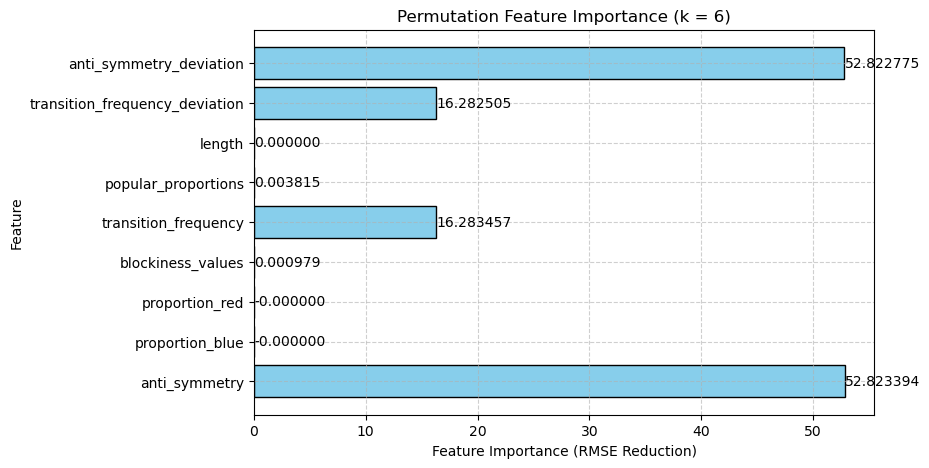

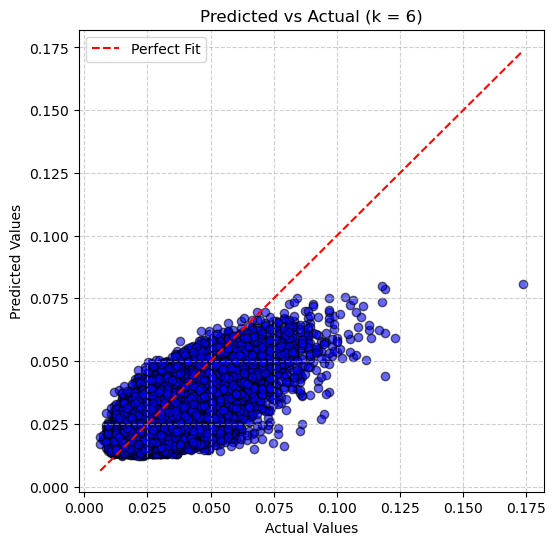


--- Results for k = 6 ---
  MSE: 0.000093
  RMSE: 0.009669
  R²: 0.268771
  Baseline RMSE: 0.011307

--- Feature Importance for k = 7 ---
anti_symmetry: 52.473118
proportion_blue: -0.000000
proportion_red: -0.000000
blockiness_values: 0.000021
transition_frequency: 15.945438
popular_proportions: 0.000088
length: 0.000000
transition_frequency_deviation: 15.943709
anti_symmetry_deviation: 52.472325


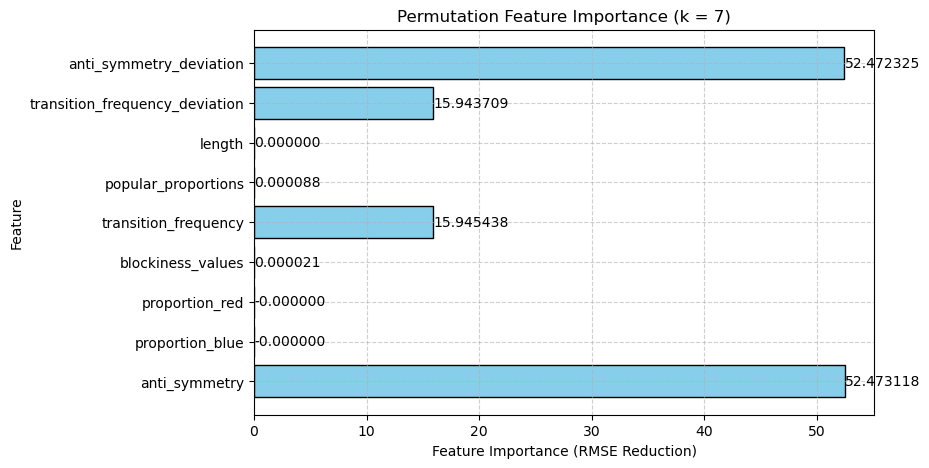

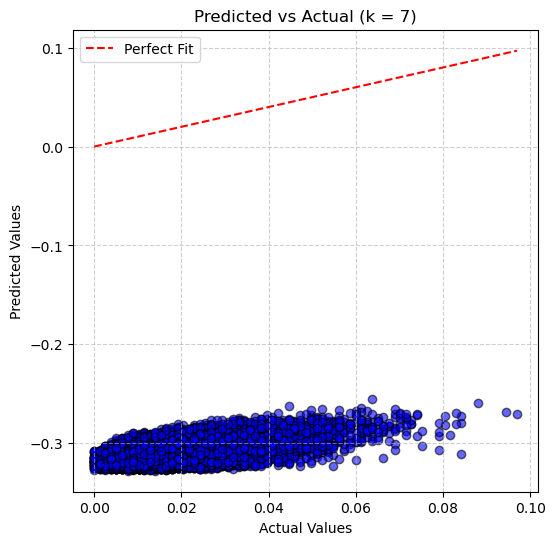


--- Results for k = 7 ---
  MSE: 0.107108
  RMSE: 0.327274
  R²: -1367.464735
  Baseline RMSE: 0.008847


In [18]:
# Dictionary to store test data
test_data_dict = {}
for k, filename in test_files.items():
    test_data_dict[k] = pd.read_csv(filename).drop(columns=['Unnamed: 0'])

# Loop through each test dataset, training a separate model for each k
for k, test_data in test_data_dict.items():
    train_data_k = train_data.copy()  

    # Separate features and target variable
    X_train = train_data_k.drop(columns=['fractions'])
    y_train = train_data_k['fractions']
    
    X_test = test_data.drop(columns=['fractions'])
    y_test = test_data['fractions']

    # Scale 'length' feature
    scaler = MinMaxScaler()
    X_train['length'] = scaler.fit_transform(X_train[['length']])  # Fit on train set
    X_test['length'] = scaler.transform(X_test[['length']])  # Transform test set

    # Train a new model for k
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Compute RMSE, MSE, and R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Compute Baseline RMSE
    y_baseline = np.full_like(y_test, 1 / (2 ** (k - 1)))  # Baseline prediction
    baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline))

    # Compute Permutation Feature Importance using RMSE
    perm_importance = permutation_importance(model, X_test, y_test, 
                                             scoring="neg_root_mean_squared_error", 
                                             random_state=42)
    
    feature_importance_values = perm_importance.importances_mean  # Mean importance per feature
    feature_names = X_train.columns

    # Print feature importances
    print(f"\n--- Feature Importance for k = {k} ---")
    for feature, importance in zip(feature_names, feature_importance_values):
        print(f"{feature}: {importance:.6f}")

    # Plot Feature Importance with values on bars
    plt.figure(figsize=(8, 5))
    bars = plt.barh(feature_names, feature_importance_values, color='skyblue', edgecolor='black')

    for bar, importance in zip(bars, feature_importance_values):
        plt.text(bar.get_width() + 0.0001, bar.get_y() + bar.get_height()/2, f'{importance:.6f}', 
                 va='center', ha='left', fontsize=10)

    plt.xlabel("Feature Importance (RMSE Reduction)")
    plt.ylabel("Feature")
    plt.title(f"Permutation Feature Importance (k = {k})")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Scatter Plot of Predictions vs. Actual Values
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='black')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Perfect Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Predicted vs Actual (k = {k})")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Print results for this k
    print(f"\n--- Results for k = {k} ---")
    print(f"  MSE: {mse:.6f}")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  R²: {r2:.6f}")
    print(f"  Baseline RMSE: {baseline_rmse:.6f}")


In [7]:
train_data.head()

,anti_symmetry,proportion_blue,proportion_red,blockiness_values,transition_frequency,popular_proportions,length,transition_frequency_deviation,anti_symmetry_deviation,fractions
0,0.58,0.51,0.49,0.07,0.225,0.51,3,-0.022542,0.079974,0.244898
1,0.56,0.50,0.50,0.07,0.225,0.50,3,-0.022542,0.059974,0.237551
2,0.44,0.52,0.48,0.08,0.240,0.52,3,-0.007542,-0.060026,0.251020
3,0.42,0.55,0.45,0.07,0.225,0.55,3,-0.022542,-0.080026,0.255918
4,0.52,0.50,0.50,0.08,0.270,0.50,3,0.022458,0.019974,0.245714


In [3]:
test_data6 = pd.read_csv('test_data6.csv').drop(columns=['Unnamed: 0'])

In [34]:
test_data6.head()

,anti_symmetry,proportion_blue,proportion_red,blockiness_values,transition_frequency,popular_proportions,length,transition_frequency_deviation,anti_symmetry_deviation,fractions
0,0.58,0.47,0.53,0.06,0.265,0.53,6,0.017479,0.079996,0.015789
1,0.48,0.48,0.52,0.06,0.275,0.52,6,0.027479,-0.020004,0.023158
2,0.30,0.41,0.59,0.08,0.190,0.59,6,-0.057521,-0.200004,0.042105
3,0.48,0.48,0.52,0.07,0.265,0.52,6,0.017479,-0.020004,0.025263
4,0.62,0.45,0.55,0.05,0.260,0.55,6,0.012479,0.119996,0.031579


## Random Forest


--- Results for k = 3 ---
  MSE: 0.000053
  RMSE: 0.007251
  R²: 0.667885
  Baseline RMSE: 0.012583

Feature Importance:
                       Feature  Importance
                        length    0.985115
           popular_proportions    0.010479
             blockiness_values    0.001288
          transition_frequency    0.000776
transition_frequency_deviation    0.000775
       anti_symmetry_deviation    0.000557
                 anti_symmetry    0.000556
               proportion_blue    0.000227
                proportion_red    0.000227


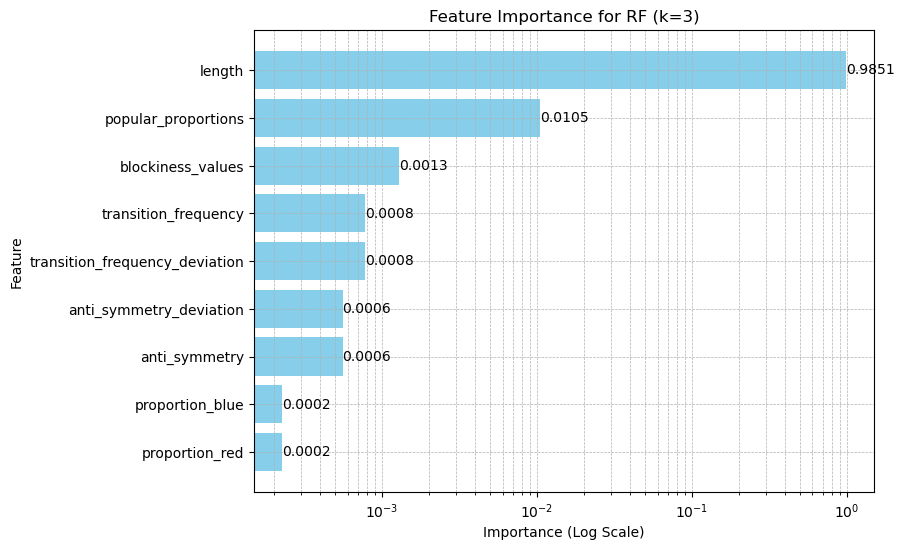

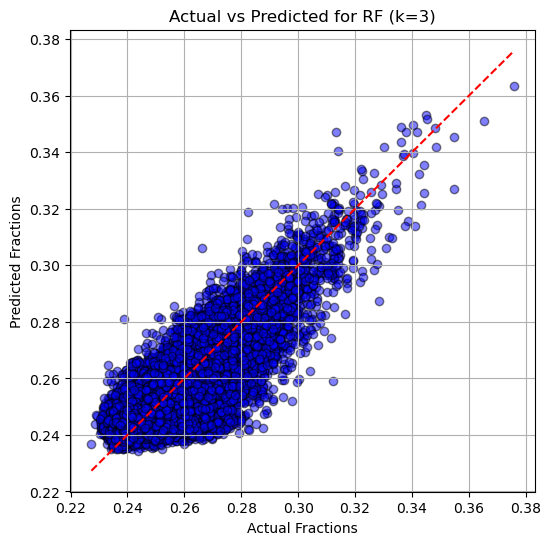


--- Results for k = 4 ---
  MSE: 0.000100
  RMSE: 0.009995
  R²: 0.517140
  Baseline RMSE: 0.014384

Feature Importance:
                       Feature  Importance
                        length    0.985115
           popular_proportions    0.010479
             blockiness_values    0.001288
          transition_frequency    0.000776
transition_frequency_deviation    0.000775
       anti_symmetry_deviation    0.000557
                 anti_symmetry    0.000556
               proportion_blue    0.000227
                proportion_red    0.000227


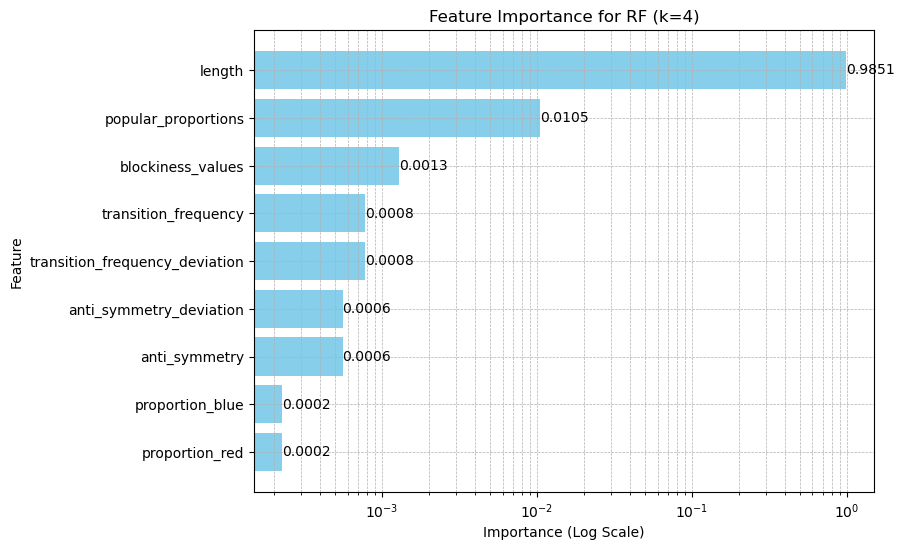

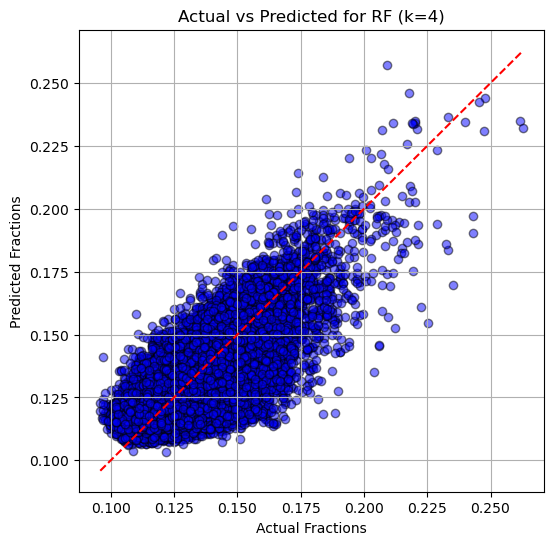


--- Results for k = 5 ---
  MSE: 0.000109
  RMSE: 0.010425
  R²: 0.397426
  Baseline RMSE: 0.013430

Feature Importance:
                       Feature  Importance
                        length    0.985115
           popular_proportions    0.010479
             blockiness_values    0.001288
          transition_frequency    0.000776
transition_frequency_deviation    0.000775
       anti_symmetry_deviation    0.000557
                 anti_symmetry    0.000556
               proportion_blue    0.000227
                proportion_red    0.000227


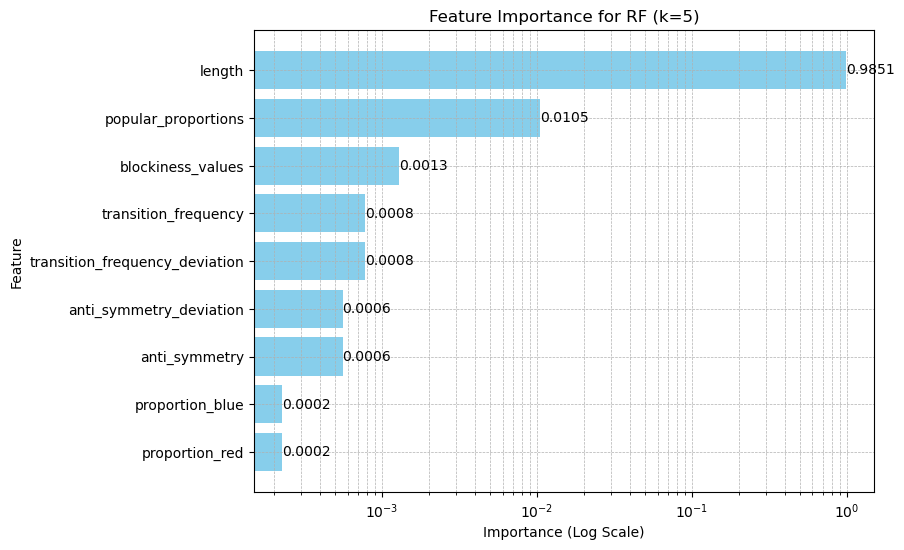

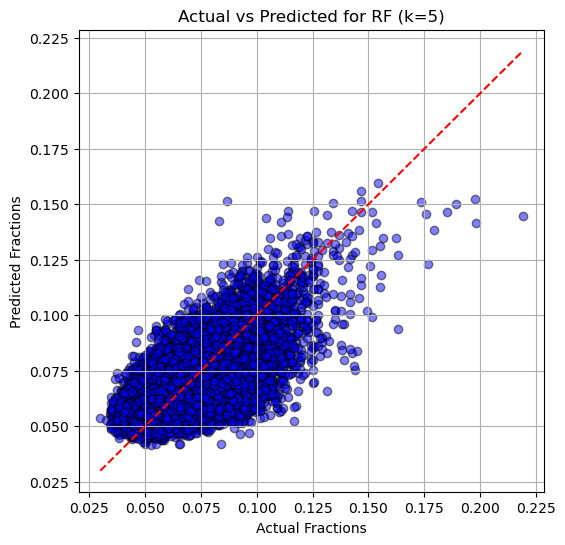


--- Results for k = 6 ---
  MSE: 0.001077
  RMSE: 0.032812
  R²: -7.421218
  Baseline RMSE: 0.011307

Feature Importance:
                       Feature  Importance
                        length    0.985115
           popular_proportions    0.010479
             blockiness_values    0.001288
          transition_frequency    0.000776
transition_frequency_deviation    0.000775
       anti_symmetry_deviation    0.000557
                 anti_symmetry    0.000556
               proportion_blue    0.000227
                proportion_red    0.000227


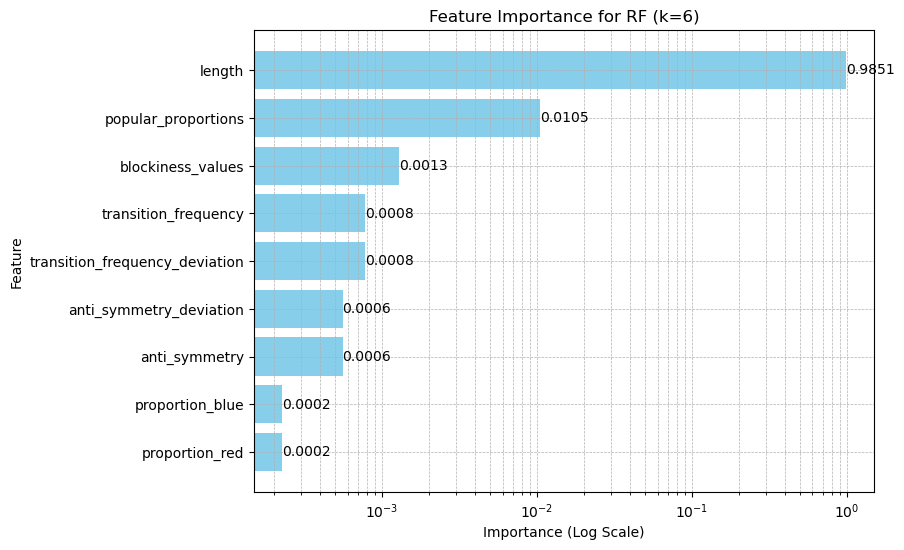

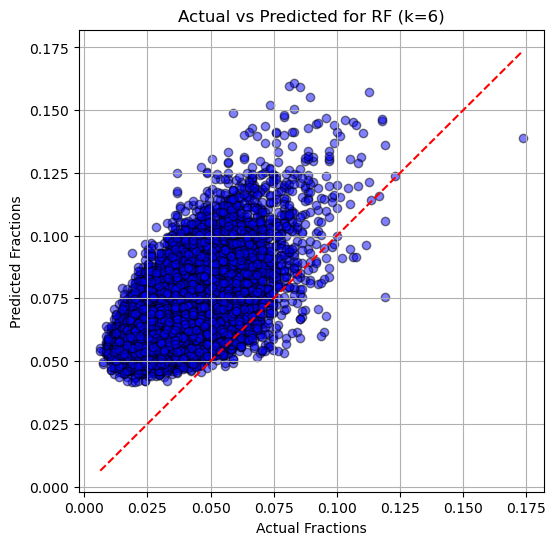


--- Results for k = 7 ---
  MSE: 0.000056
  RMSE: 0.007480
  R²: 0.285081
  Baseline RMSE: 0.008847

Feature Importance:
                       Feature  Importance
                        length    0.985115
           popular_proportions    0.010479
             blockiness_values    0.001288
          transition_frequency    0.000776
transition_frequency_deviation    0.000775
       anti_symmetry_deviation    0.000557
                 anti_symmetry    0.000556
               proportion_blue    0.000227
                proportion_red    0.000227


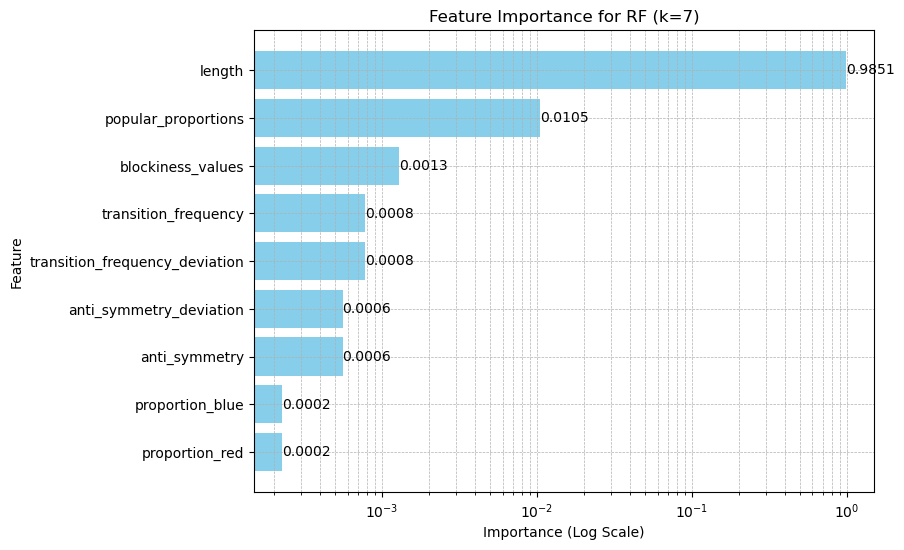

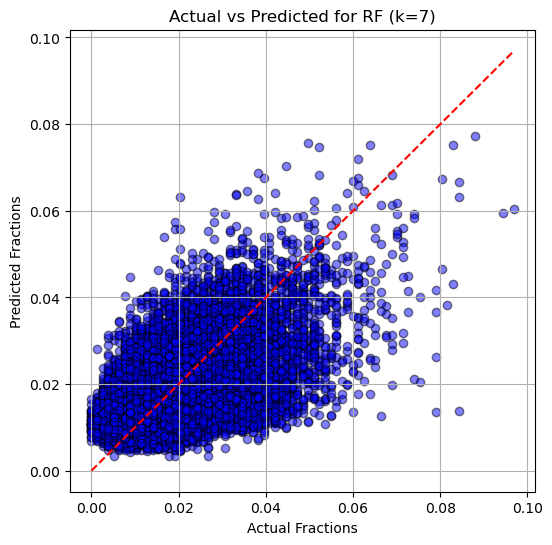

In [ ]:
test_data_dict = {}
for k, filename in test_files.items():
    test_data_dict[k] = pd.read_csv(filename).drop(columns=['Unnamed: 0'])

# Loop through each test dataset, training a separate model for each k
for k, test_data in test_data_dict.items():
    # Extract train data for the corresponding k
    train_data_k = train_data.copy()  

    # Separate features and target variable
    X_train = train_data_k.drop(columns=['fractions'])
    y_train = train_data_k['fractions']
    
    X_test = test_data.drop(columns=['fractions'])
    y_test = test_data['fractions']

    # Scale 'length' feature
    scaler = MinMaxScaler()
    X_train['length'] = scaler.fit_transform(X_train[['length']])  # Fit on train set
    X_test['length'] = scaler.transform(X_test[['length']])  # Transform test set

    # Train a new Random Forest model for this k
    rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test)

    # Compute Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Compute Baseline RMSE
    y_baseline = np.full_like(y_test, 1 / (2 ** (k - 1)))  # Baseline prediction
    baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline))

    # Print results for this k
    print(f"\n--- Results for k = {k} ---")
    print(f"  MSE: {mse:.6f}")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  R²: {r2:.6f}")
    print(f"  Baseline RMSE: {baseline_rmse:.6f}")

    # Print Feature Importance
    feature_importances = rf_model.feature_importances_
    importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    print("\nFeature Importance:")
    print(importance_df.to_string(index=False))

    # Plot Feature Importance with Log Scale
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    ax.set_xscale("log")  # Apply logarithmic scale to the x-axis
    ax.invert_yaxis()
    ax.set_title(f"Feature Importance for RF (k={k})")
    ax.set_xlabel("Importance (Log Scale)")
    ax.set_ylabel("Feature")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', 
                va='center', ha='left', fontsize=10, color='black')
    
    plt.show()

    # Scatter Plot: Actual vs Predicted
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='k')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    ax.set_title(f"Actual vs Predicted for RF (k={k})")
    ax.set_xlabel("Actual Fractions")
    ax.set_ylabel("Predicted Fractions")
    ax.grid(True)
    plt.show()


## Multi Layer Perceptron

In [22]:
test_data_dict = {}
for k, filename in test_files.items():
    test_data_dict[k] = pd.read_csv(filename).drop(columns=['Unnamed: 0'])

# Loop through each test dataset, training a separate MLP model for each k
for k, test_data in test_data_dict.items():
    # Extract train data for the corresponding k
    train_data_k = train_data.copy()  

    # Separate features and target variable
    X_train = train_data_k.drop(columns=['fractions'])
    y_train = train_data_k['fractions']
    
    X_test = test_data.drop(columns=['fractions'])
    y_test = test_data['fractions']

    # Scale 'length' feature
    scaler = MinMaxScaler()
    X_train['length'] = scaler.fit_transform(X_train[['length']])  # Fit on train set
    X_test['length'] = scaler.transform(X_test[['length']])  # Transform test set

    # Train a new MLP model for this k
    mlp_model = MLPRegressor(hidden_layer_sizes=(200, 250), activation='relu', random_state=42, max_iter=500)
    mlp_model.fit(X_train, y_train)

    # Predictions
    y_pred = mlp_model.predict(X_test)

    # Compute Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Compute Baseline RMSE
    y_baseline = np.full_like(y_test, 1 / (2 ** (k - 1)))  # Baseline prediction
    baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline))

    # Print results for this k
    print(f"\n--- MLP Results for k = {k} ---")
    print(f"  MSE: {mse:.6f}")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  R²: {r2:.6f}")
    print(f"  Baseline RMSE: {baseline_rmse:.6f}")



--- MLP Results for k = 3 ---
  MSE: 0.000050
  RMSE: 0.007061
  R²: 0.685125
  Baseline RMSE: 0.012583

--- MLP Results for k = 4 ---
  MSE: 0.000086
  RMSE: 0.009297
  R²: 0.582283
  Baseline RMSE: 0.014384

--- MLP Results for k = 5 ---
  MSE: 0.000093
  RMSE: 0.009639
  R²: 0.484864
  Baseline RMSE: 0.013430

--- MLP Results for k = 6 ---
  MSE: 0.000100
  RMSE: 0.010008
  R²: 0.216556
  Baseline RMSE: 0.011307

--- MLP Results for k = 7 ---
  MSE: 0.000049
  RMSE: 0.006983
  R²: 0.376909
  Baseline RMSE: 0.008847


## Random Forest with feature importances


--- Feature Importance for k = 3 ---
anti_symmetry: 0.000081
proportion_blue: 0.001259
proportion_red: 0.001424
blockiness_values: 0.000288
transition_frequency: 0.000044
popular_proportions: 0.004715
length: 0.000000
transition_frequency_deviation: 0.000042
anti_symmetry_deviation: 0.000000


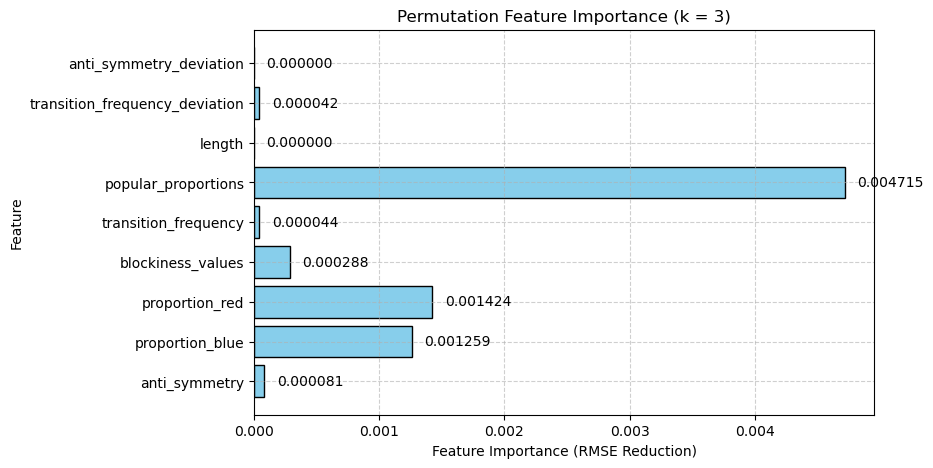

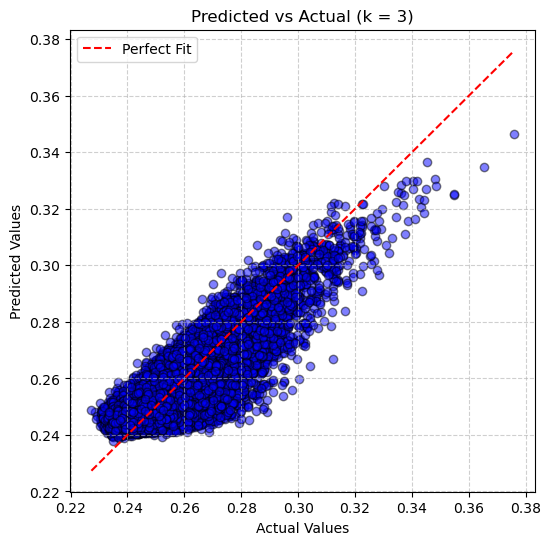


--- MLP Results for k = 3 ---
  MSE: 0.000050
  RMSE: 0.007061
  Baseline RMSE: 0.012583

--- Feature Importance for k = 4 ---
anti_symmetry: 0.000228
proportion_blue: 0.001239
proportion_red: 0.001295
blockiness_values: 0.000822
transition_frequency: 0.000047
popular_proportions: 0.003242
length: 0.000000
transition_frequency_deviation: 0.000090
anti_symmetry_deviation: 0.000313


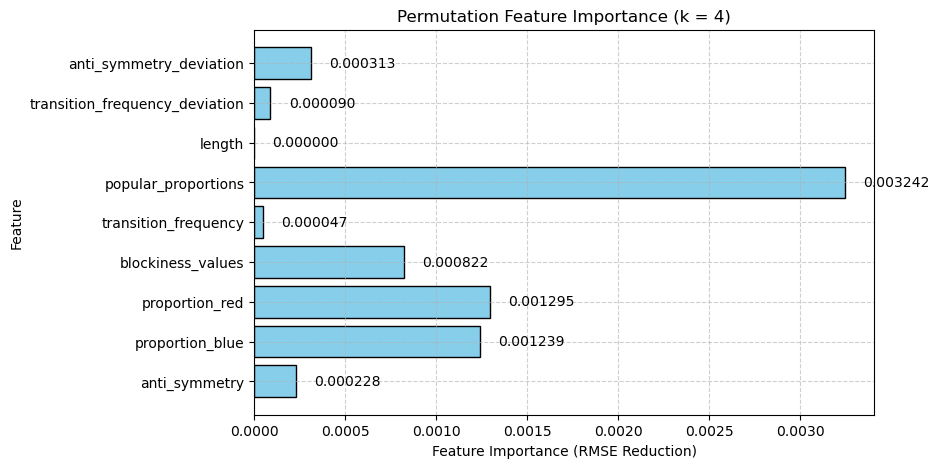

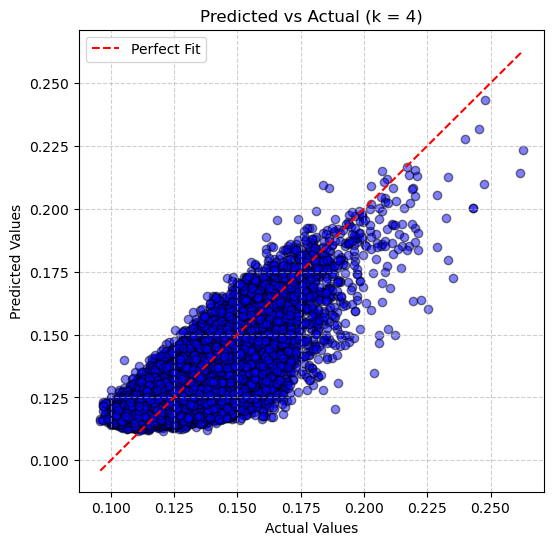


--- MLP Results for k = 4 ---
  MSE: 0.000086
  RMSE: 0.009297
  Baseline RMSE: 0.014384

--- Feature Importance for k = 5 ---
anti_symmetry: 0.000258
proportion_blue: 0.000953
proportion_red: 0.001018
blockiness_values: 0.001088
transition_frequency: 0.000013
popular_proportions: 0.001937
length: 0.000000
transition_frequency_deviation: 0.000044
anti_symmetry_deviation: 0.000372


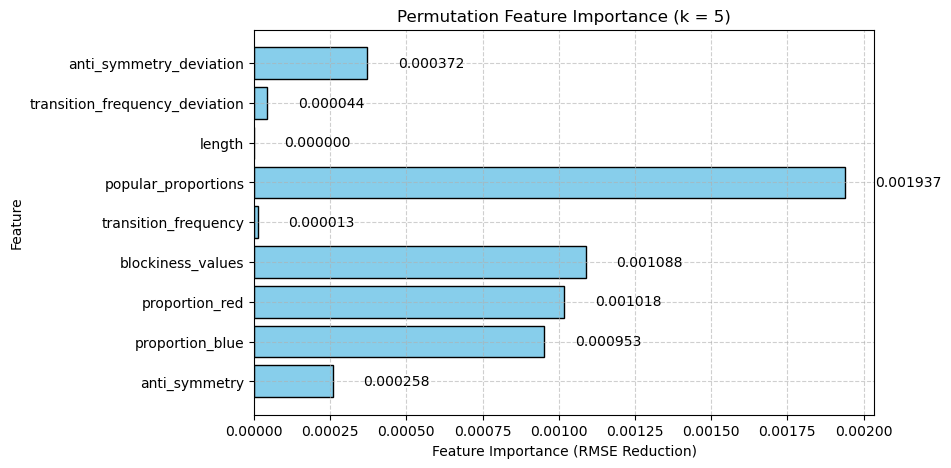

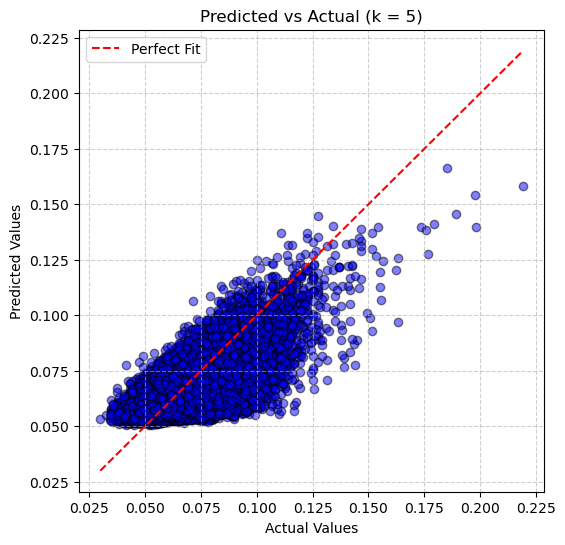


--- MLP Results for k = 5 ---
  MSE: 0.000093
  RMSE: 0.009639
  Baseline RMSE: 0.013430

--- Feature Importance for k = 6 ---
anti_symmetry: 0.000093
proportion_blue: 0.000164
proportion_red: 0.000192
blockiness_values: 0.001158
transition_frequency: -0.000011
popular_proportions: 0.000907
length: 0.000000
transition_frequency_deviation: 0.000012
anti_symmetry_deviation: 0.000136


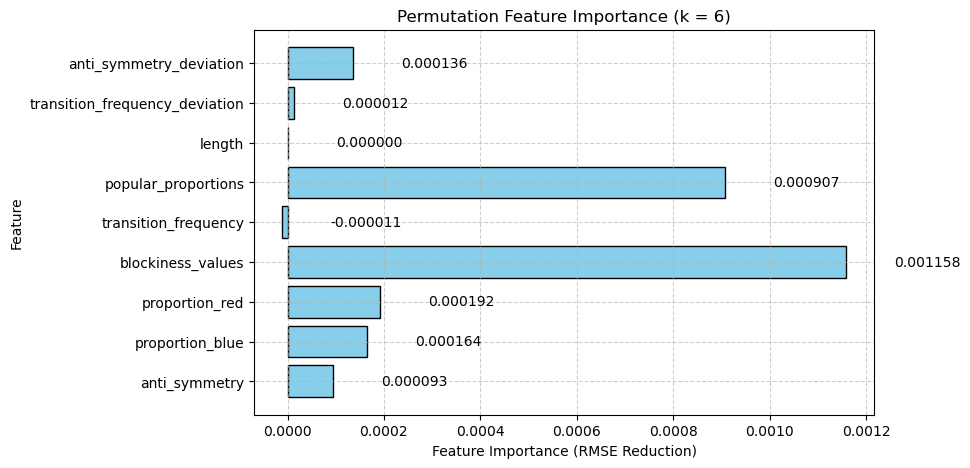

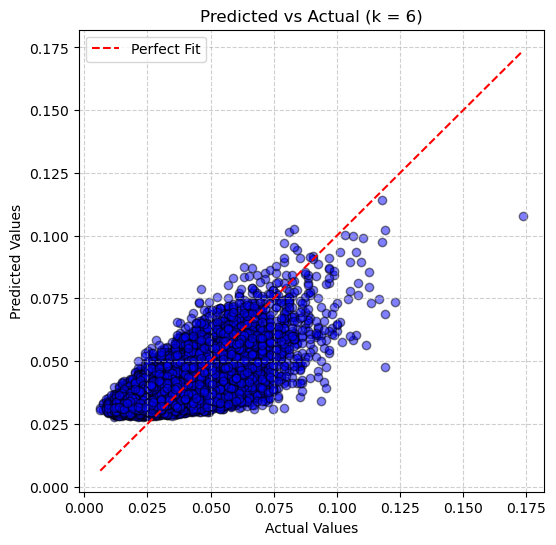


--- MLP Results for k = 6 ---
  MSE: 0.000100
  RMSE: 0.010008
  Baseline RMSE: 0.011307

--- Feature Importance for k = 7 ---
anti_symmetry: 0.000145
proportion_blue: 0.000371
proportion_red: 0.000413
blockiness_values: 0.001174
transition_frequency: 0.000019
popular_proportions: 0.000837
length: 0.000000
transition_frequency_deviation: 0.000022
anti_symmetry_deviation: 0.000202


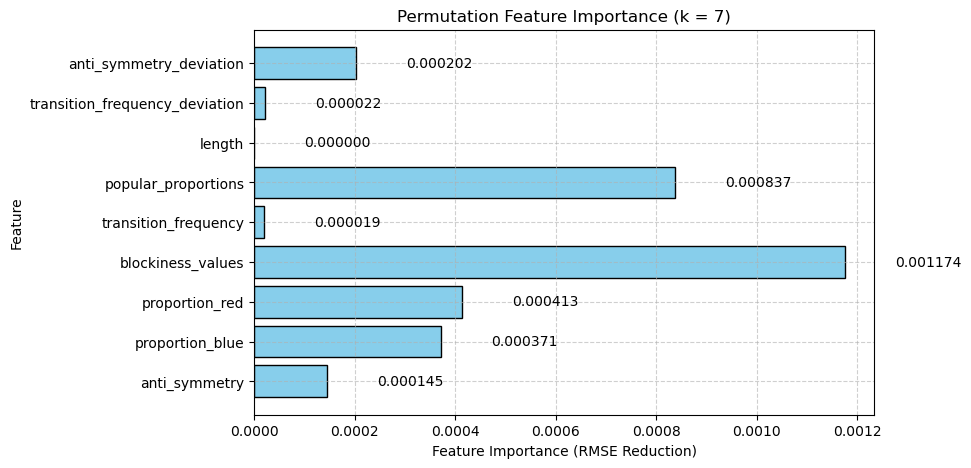

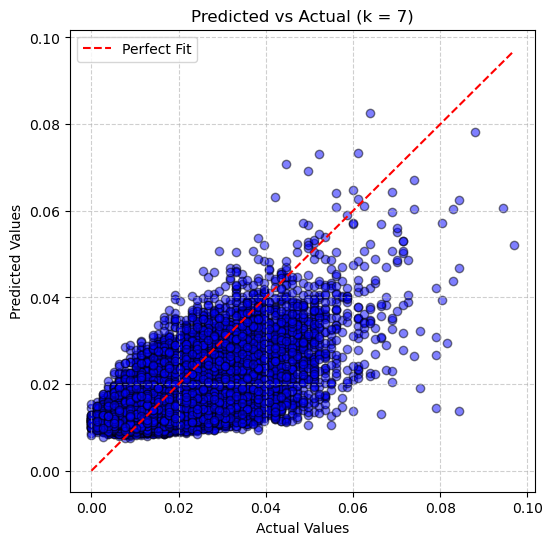


--- MLP Results for k = 7 ---
  MSE: 0.000049
  RMSE: 0.006983
  Baseline RMSE: 0.008847


In [ ]:
# Dictionary to store test data
test_data_dict = {}
for k, filename in test_files.items():
    test_data_dict[k] = pd.read_csv(filename).drop(columns=['Unnamed: 0'])

# Loop through each test dataset, training a separate MLP model for each k
for k, test_data in test_data_dict.items():
    # Extract train data for the corresponding k
    train_data_k = train_data.copy()

    # Separate features and target variable
    X_train = train_data_k.drop(columns=['fractions'])
    y_train = train_data_k['fractions']
    
    X_test = test_data.drop(columns=['fractions'])
    y_test = test_data['fractions']

    # Scale 'length' feature
    scaler = MinMaxScaler()
    X_train['length'] = scaler.fit_transform(X_train[['length']])
    X_test['length'] = scaler.transform(X_test[['length']])

    # Train MLP model
    mlp_model = MLPRegressor(hidden_layer_sizes=(200, 250), activation='relu', 
                             random_state=42, max_iter=500)
    mlp_model.fit(X_train, y_train)

    # Predictions
    y_pred = mlp_model.predict(X_test)

    # Compute Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Compute Baseline RMSE
    y_baseline = np.full_like(y_test, 1 / (2 ** (k - 1)))
    baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline))

    # Compute Permutation Feature Importance
    perm_importance = permutation_importance(mlp_model, X_test, y_test, 
                                             scoring="neg_root_mean_squared_error", 
                                             random_state=42)
    
    feature_importance_values = perm_importance.importances_mean
    feature_names = X_train.columns

    # Print feature importances
    print(f"\n--- Feature Importance for k = {k} ---")
    for feature, importance in zip(feature_names, feature_importance_values):
        print(f"{feature}: {importance:.6f}")

    # Plot Feature Importance
    plt.figure(figsize=(8, 5))  # Set a fixed figure size
    bars = plt.barh(feature_names, feature_importance_values, color='skyblue', edgecolor='black')

    for bar, importance in zip(bars, feature_importance_values):
        plt.text(bar.get_width() + 0.0001, bar.get_y() + bar.get_height()/2, f'{importance:.6f}', 
                 va='center', ha='left', fontsize=10)

    plt.xlabel("Feature Importance (RMSE Reduction)")
    plt.ylabel("Feature")
    plt.title(f"Permutation Feature Importance (k = {k})")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Scatter Plot of Predictions vs. Actual Values
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Perfect Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Predicted vs Actual (k = {k})")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Print results for this k
    print(f"\n--- MLP Results for k = {k} ---")
    print(f"  MSE: {mse:.6f}")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  Baseline RMSE: {baseline_rmse:.6f}")


## Single Perceptron

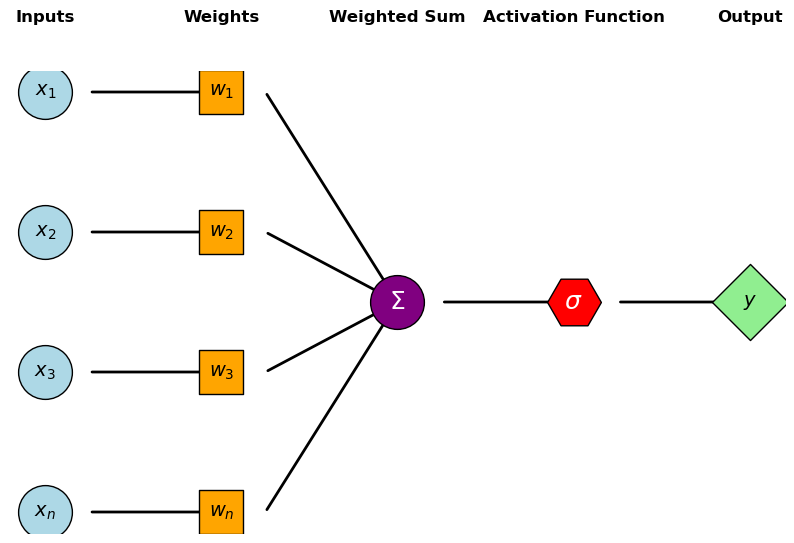

In [ ]:


plt.figure(figsize=(10, 6))
ax = plt.gca()

# Input nodes
input_positions = [0.2] * 4
input_labels = [r'$x_1$', r'$x_2$', r'$x_3$', r'$x_n$']
y_positions = [0.8, 0.6, 0.4, 0.2]

plt.scatter(input_positions, y_positions, s=1500, color='lightblue', edgecolor='black', zorder=5)
for x, y, label in zip(input_positions, y_positions, input_labels):
    plt.text(x, y, label, ha='center', va='center', fontsize=14, zorder=6)

# Weight boxes
weight_positions_x = [0.4] * 4
plt.scatter(weight_positions_x, y_positions, s=1000, color='orange', edgecolor='black', marker='s', zorder=5)
weight_labels = [r'$w_1$', r'$w_2$', r'$w_3$', r'$w_n$']

for x, y, label in zip(weight_positions_x, y_positions, weight_labels):
    plt.text(x, y, label, ha='center', va='center', fontsize=14, zorder=6)

# Summation node
plt.scatter([0.6], [0.5], s=1500, color='purple', edgecolor='black', zorder=5)
plt.text(0.6, 0.5, r'$\Sigma$', ha='center', va='center', fontsize=18, color='white', zorder=6)

# Activation function
plt.scatter([0.8], [0.5], s=1500, color='red', edgecolor='black', marker='H', zorder=5)
plt.text(0.8, 0.5, r'$\sigma$', ha='center', va='center', fontsize=18, color='white', zorder=6)

# Output node
plt.scatter([1.0], [0.5], s=1500, color='lightgreen', edgecolor='black', marker='D', zorder=5)
plt.text(1.0, 0.5, r'$y$', ha='center', va='center', fontsize=14, zorder=6)

# Arrows for connections (Adjusted arrow points)
for i, y in enumerate(y_positions):
    plt.annotate('', xy=(0.4, y), xytext=(0.25, y), arrowprops=dict(arrowstyle='->', lw=2), zorder=4)
    plt.annotate('', xy=(0.6, 0.5), xytext=(0.45, y), arrowprops=dict(arrowstyle='->', lw=2), zorder=4)

# Arrows to summation and activation
plt.annotate('', xy=(0.8, 0.5), xytext=(0.65, 0.5), arrowprops=dict(arrowstyle='->', lw=2), zorder=4)
plt.annotate('', xy=(1.0, 0.5), xytext=(0.85, 0.5), arrowprops=dict(arrowstyle='->', lw=2), zorder=4)

# Labels
plt.text(0.2, 0.9, 'Inputs', ha='center', fontsize=12, fontweight='bold')
plt.text(0.4, 0.9, 'Weights', ha='center', fontsize=12, fontweight='bold')
plt.text(0.6, 0.9, 'Weighted Sum', ha='center', fontsize=12, fontweight='bold')
plt.text(0.8, 0.9, 'Activation Function', ha='center', fontsize=12, fontweight='bold')
plt.text(1.0, 0.9, 'Output', ha='center', fontsize=12, fontweight='bold')

# Hide axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()